In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from preprocessing import *
from mathutils import *

%matplotlib inline

sns.set(style='whitegrid')

rcParams['figure.figsize'] = 12, 6

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

softmax(np.array([[2, 4, 6, 8]]))

array([[0.00214401, 0.0158422 , 0.11705891, 0.86495488]])

In [3]:
epochs = 60000
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
LR = 0.1

X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([ [0],   [1],   [1],   [0]])

In [4]:
w_hidden = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
w_output = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))

In [5]:
def sigmoid (x): return 1/(1 + np.exp(-x))
def sigmoid_prime(x): return x * (1 - x)

In [6]:
for epoch in range(epochs):
    # Forward
    act_hidden = sigmoid(np.dot(X, w_hidden))
    output = np.dot(act_hidden, w_output)

    # Calculate error
    error = y - output

    if epoch % 5000 == 0:
        print(f'error sum {sum(error)}')

    # Backward
    dZ = error * LR
    w_output += act_hidden.T.dot(dZ)
    dH = dZ.dot(w_output.T) * sigmoid_prime(act_hidden)
    w_hidden += X.T.dot(dH)

error sum [-1.77496016]
error sum [0.02481767]
error sum [0.01544889]
error sum [0.01214582]
error sum [0.01032507]
error sum [0.00913186]
error sum [0.00827274]
error sum [0.00761624]
error sum [0.00709348]
error sum [0.00666447]
error sum [0.00630417]
error sum [0.00599601]


In [8]:
X_test = X[1] # [0, 1]

act_hidden = sigmoid(np.dot(X_test, w_hidden))
np.round(np.dot(act_hidden, w_output))

array([1.])

Loading MNIST dataset...
MNIST dataset loaded.


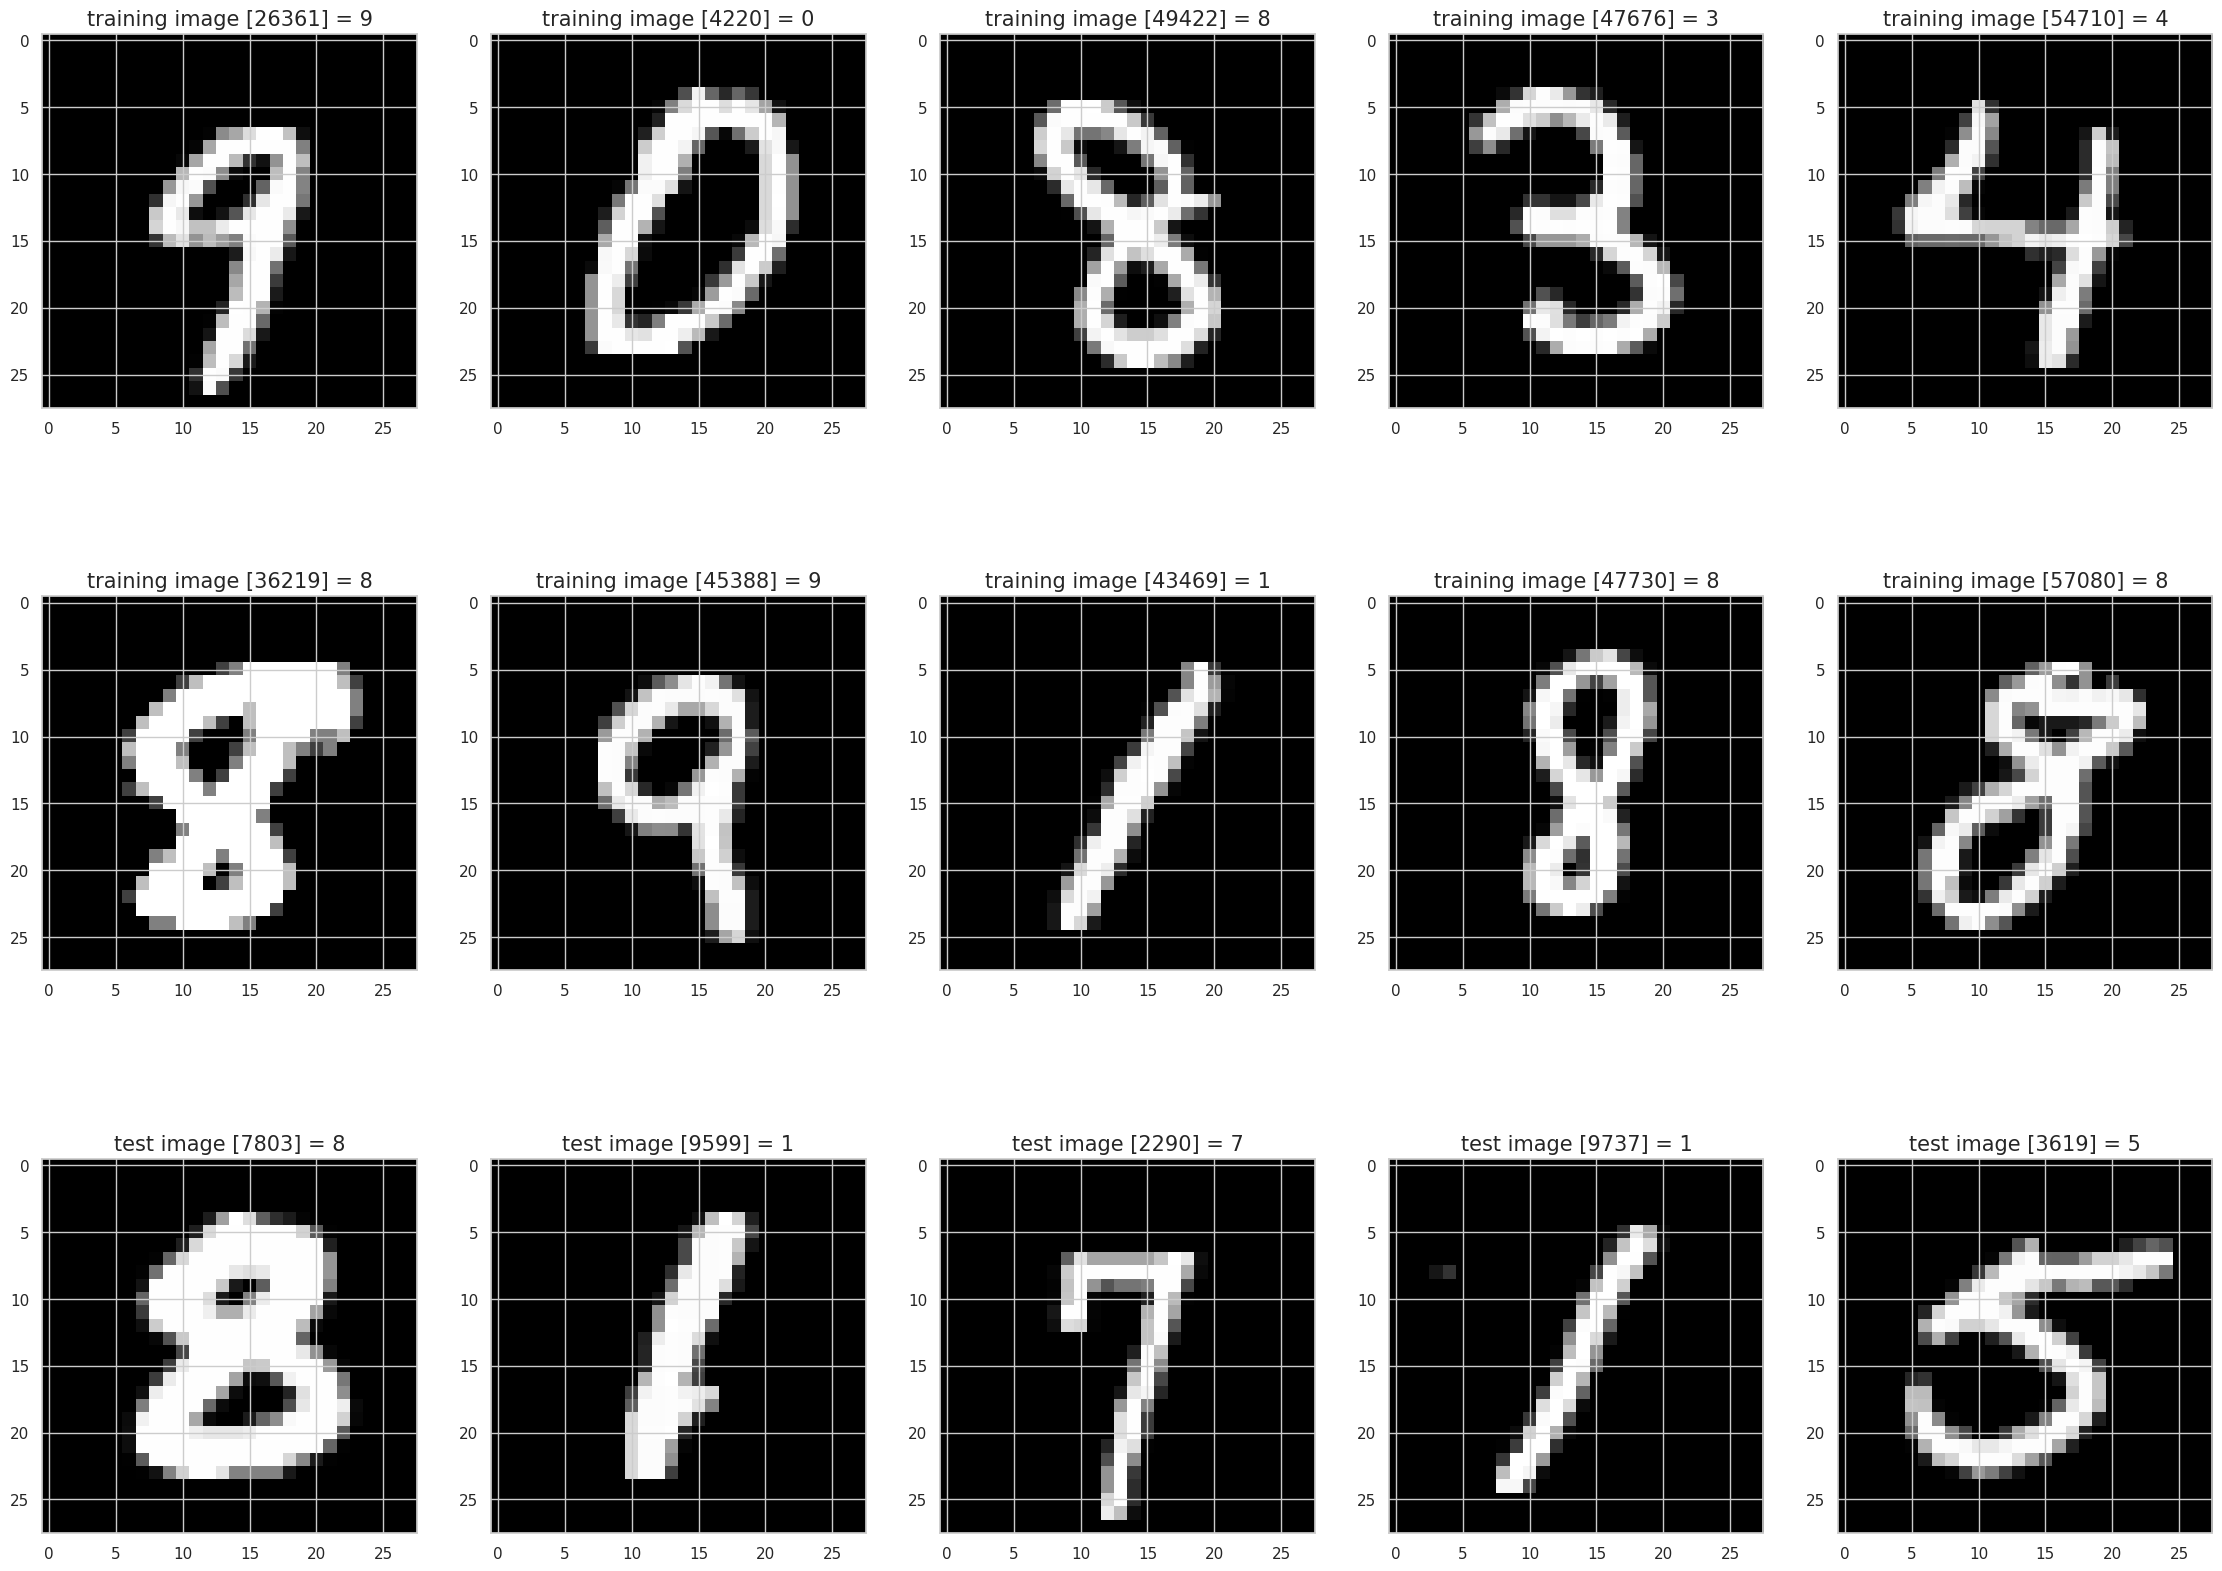

In [ ]:
import struct
from array import array
import random

class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)  

# Set file paths based on added MNIST Datasets
training_images_filepath = './datasets/train-images.idx3-ubyte'
training_labels_filepath = './datasets/train-labels.idx1-ubyte'
test_images_filepath = './datasets/t10k-images.idx3-ubyte'
test_labels_filepath = './datasets/t10k-labels.idx1-ubyte'

# Load MINST dataset
print('Loading MNIST dataset...')
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()
print('MNIST dataset loaded.')

# Show example images
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(28, 28))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

random_images = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    random_images.append((x_train[r], 'training image [' + str(r) + '] = ' + str(y_train[r])))
for i in range(0, 5):
    r = random.randint(1, 10000)
    random_images.append((x_test[r], 'test image [' + str(r) + '] = ' + str(y_test[r])))

show_images(list(map(lambda x: x[0], random_images)), list(map(lambda x: x[1], random_images)))

Another

In [7]:
class linear_layer():
    def __init__(self, dim_in, dim_out):
        self.W = 1
        self.B = 1
NN = [linear, relu, linear]

NameError: name 'linear' is not defined